# Subsetting a dataset by time and space (Slicing and Dicing)

Reload the library and the dataset from the previous notebook

In [29]:
%matplotlib inline

In [1]:
import xarray

In [2]:
ds = xarray.open_dataset('http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc')

Select just the data variable `tas` and save it to another variable

In [5]:
tas = ds.tas
tas

<xarray.DataArray 'tas' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-02-05T23:49:51Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

xarray builds on top of numpy, and stores it's data internally as numpy arrays. It supports many numpy operations, so it is possible to find out the shape of the underlying data, and use numpy style indexing

In [19]:
tas.shape

(1872, 145, 192)

In [20]:
tas[0,:]

<xarray.DataArray 'tas' (lat: 145, lon: 192)>
array([[240.83618, 240.83618, 240.83618, ..., 240.83191, 240.83191, 240.83191],
       [242.67894, 242.65828, 242.63867, ..., 242.72214, 242.71056, 242.69565],
       [243.58124, 243.52393, 243.46175, ..., 243.73363, 243.69022, 243.6365 ],
       ...,
       [239.76013, 239.84523, 239.93364, ..., 239.52486, 239.60957, 239.68538],
       [239.02599, 239.03561, 239.04205, ..., 239.04428, 239.03633, 239.02672],
       [238.45506, 238.45506, 238.45506, ..., 238.45506, 238.45506, 238.45506]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1850-01-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: area

By selecting just the first time index it has created a DataArray with no time dimension, but time is still a coordinate not associated with any variable, as indicated by no longer having `*` beside it. The index selection above is equivalent to using `isel` like so

In [21]:
tas.isel(time=0)

<xarray.DataArray 'tas' (lat: 145, lon: 192)>
array([[240.83618, 240.83618, 240.83618, ..., 240.83191, 240.83191, 240.83191],
       [242.67894, 242.65828, 242.63867, ..., 242.72214, 242.71056, 242.69565],
       [243.58124, 243.52393, 243.46175, ..., 243.73363, 243.69022, 243.6365 ],
       ...,
       [239.76013, 239.84523, 239.93364, ..., 239.52486, 239.60957, 239.68538],
       [239.02599, 239.03561, 239.04205, ..., 239.04428, 239.03633, 239.02672],
       [238.45506, 238.45506, 238.45506, ..., 238.45506, 238.45506, 238.45506]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1850-01-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: area

One way is more compact, and one more descriptive, but they have the same result.

Now plot the resulting 2D dataset

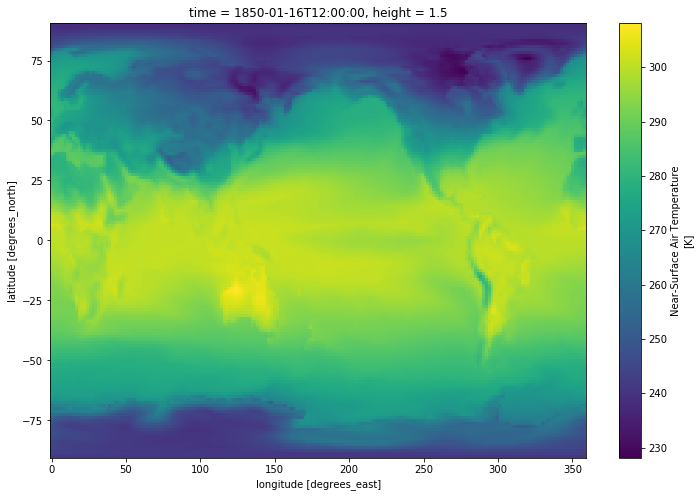

In [32]:
tas[0,:].plot(size=8)

The power of xarray comes with the close association of data with coordinates. So it is possible to use the equivalent `.sel` operator but with coordinate values. For example, to select an area that includes the Indian Ocean and Australia uses `slice` to indicate the range of values and pass a key/value pairs to `sel`

In [23]:
tas.sel(lon=slice(20,160),lat=slice(-80,25))

<xarray.DataArray 'tas' (time: 1872, lat: 85, lon: 75)>
[11934000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat      (lat) float64 -80.0 -78.75 -77.5 -76.25 ... 21.25 22.5 23.75 25.0
  * lon      (lon) float64 20.62 22.5 24.38 26.25 ... 153.8 155.6 157.5 159.4
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-02-05T23:49:51Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

Operators can be chained, so multiple operations can be peformed sequentially. For example, to select the above areas and the first time index

In [24]:
tas.isel(time=0).sel(lon=slice(20,160), lat=slice(-80,25))

<xarray.DataArray 'tas' (lat: 85, lon: 75)>
array([[244.32095, 244.06064, 243.80359, ..., 251.85716, 253.08392, 254.23578],
       [243.11086, 242.9945 , 242.96965, ..., 250.56412, 252.03651, 253.29895],
       [242.59998, 242.75227, 242.95288, ..., 251.33804, 252.93666, 254.82977],
       ...,
       [280.82947, 281.203  , 281.8401 , ..., 298.99326, 299.03836, 299.07532],
       [280.9224 , 281.0952 , 281.43793, ..., 297.9115 , 298.03323, 298.08383],
       [280.7901 , 281.48508, 281.8507 , ..., 296.3739 , 296.66852, 296.84888]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1850-01-16T12:00:00
  * lat      (lat) float64 -80.0 -78.75 -77.5 -76.25 ... 21.25 22.5 23.75 25.0
  * lon      (lon) float64 20.62 22.5 24.38 26.25 ... 153.8 155.6 157.5 159.4
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacell

And once again, plot the result

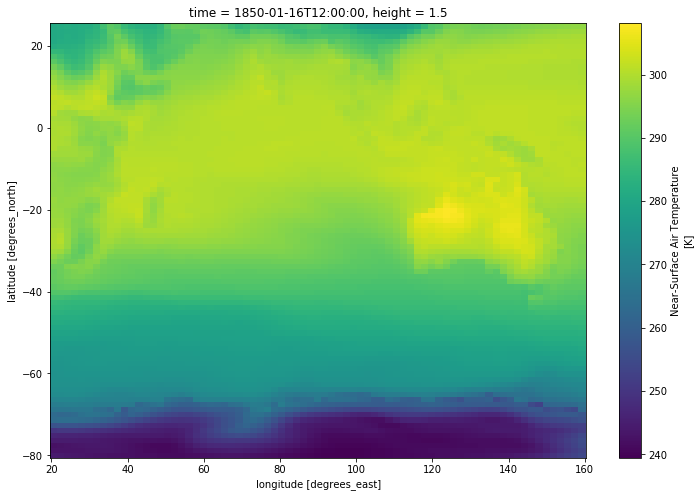

In [33]:
tas.isel(time=0).sel(lon=slice(20,160), lat=slice(-80,25)).plot(size=8)

In this case it is more convenient to use `isel` to select the time, rather than specifying a date, but this would also work

In [25]:
tas.sel(time='1850-01-16', lon=slice(20,160), lat=slice(-80,25))

<xarray.DataArray 'tas' (time: 1, lat: 85, lon: 75)>
array([[[244.32095, 244.06064, ..., 253.08392, 254.23578],
        [243.11086, 242.9945 , ..., 252.03651, 253.29895],
        ...,
        [280.9224 , 281.0952 , ..., 298.03323, 298.08383],
        [280.7901 , 281.48508, ..., 296.66852, 296.84888]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00
  * lat      (lat) float64 -80.0 -78.75 -77.5 -76.25 ... 21.25 22.5 23.75 25.0
  * lon      (lon) float64 20.62 22.5 24.38 26.25 ... 153.8 155.6 157.5 159.4
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-02-05T23:49:51Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

It is also possible to use `slice` for the `time` dimension. To select Mar to November of 1871:

In [34]:
tas.sel(time=slice('1871-03','1871-11'), lon=slice(20,160), lat=slice(-80,25))

<xarray.DataArray 'tas' (time: 9, lat: 85, lon: 75)>
array([[[232.72298, 232.41539, ..., 240.3316 , 241.3103 ],
        [230.3484 , 230.09096, ..., 241.09224, 242.43002],
        ...,
        [287.8961 , 287.78564, ..., 296.20505, 296.41022],
        [288.0455 , 288.2771 , ..., 294.80002, 294.9939 ]],

       [[230.42459, 229.92857, ..., 240.06776, 241.25368],
        [227.20078, 226.75165, ..., 239.50015, 241.08636],
        ...,
        [293.6292 , 293.43594, ..., 297.73218, 297.78775],
        [293.78354, 294.1199 , ..., 296.54602, 296.6775 ]],

       ...,

       [[234.84286, 234.5873 , ..., 242.15875, 243.17744],
        [233.36253, 233.07495, ..., 242.26463, 243.54987],
        ...,
        [290.4821 , 290.44135, ..., 300.78342, 300.67822],
        [290.74014, 291.0542 , ..., 300.5218 , 300.38864]],

       [[237.83063, 237.62698, ..., 248.45111, 249.83937],
        [236.2484 , 235.9952 , ..., 247.79037, 249.23076],
        ...,
        [286.57666, 286.7646 , ..., 299.87238, 299